# Problem Statement : New York City Taxi Fare Prediction

## Import Packages and Read the Data

In [1]:
import csv
import random
import numpy as np
import pandas as pd
import dask.dataframe as dd
import os
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt    
%matplotlib inline
import re
import seaborn as sns
import gc
import time
from math import radians, cos, sin, asin, sqrt
import warnings
warnings.filterwarnings("ignore")

In [2]:
d=pd.read_csv("TaxiFare.csv")

## Exploratory Data Analysis

In [3]:
d.head(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,50:45.0,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,35:00.0,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,22:00.0,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,10:00.0,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,11:00.0,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [4]:
d.tail(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
49990,16:00.0,4.5,2013-07-18 00:16:00 UTC,-74.002857,40.734137,-74.001610,40.739282,1
49991,56:19.0,10.5,2013-10-17 19:56:19 UTC,-73.991685,40.739494,-73.985357,40.731971,1
49992,41:47.0,6.1,2009-06-06 10:41:47 UTC,-73.984673,40.768434,-73.988215,40.760082,1
49993,27:00.0,7.3,2011-04-07 14:27:00 UTC,-73.982363,40.765060,-73.969167,40.761268,1
49994,57:00.0,8.5,2012-10-13 19:57:00 UTC,-73.976212,40.744832,-73.981567,40.724635,1
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2
49999,13:14.0,10.9,2010-01-13 08:13:14 UTC,-73.932603,40.763805,-73.932603,40.763805,1


In [5]:
d.sample(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
6672,31:00.0,9.5,2013-07-12 02:31:00 UTC,-73.968398,40.799457,-73.942802,40.811382,1
41519,46:32.0,11.7,2009-02-19 15:46:32 UTC,-73.977020,40.742072,-74.009180,40.702411,1
38017,49:51.0,9.7,2011-03-26 13:49:51 UTC,-73.973480,40.779631,-73.976507,40.751638,2
15649,29:31.0,7.7,2011-04-20 22:29:31 UTC,-73.952346,40.781196,-73.962698,40.759076,2
35623,37:40.0,8.5,2011-05-07 17:37:40 UTC,-73.978308,40.752456,-74.004245,40.742477,1
18725,38:02.0,11.3,2012-05-17 23:38:02 UTC,-73.982111,40.776187,-73.989950,40.762028,1
43163,23:54.0,12.0,2015-03-23 19:23:54 UTC,-74.000298,40.723778,-73.983261,40.695187,1
48882,41:19.0,9.5,2014-02-23 02:41:19 UTC,-73.996259,40.736496,-73.993408,40.721669,1
27383,09:00.0,4.1,2010-10-26 09:09:00 UTC,0.000000,0.000000,0.000000,0.000000,2
31194,10:00.0,22.9,2011-01-24 12:10:00 UTC,-74.001850,40.715613,-73.954742,40.788307,1


In [6]:
d.shape

(50000, 8)

In [7]:
d.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [8]:
d.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [9]:
d.median()

amount                   8.500000
longitude_of_pickup    -73.981840
latitude_of_pickup      40.752678
longitude_of_dropoff   -73.980082
latitude_of_dropoff     40.753372
no_of_passenger          1.000000
dtype: float64

In [10]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [11]:
d.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [12]:
d.describe(include="all")

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2011-09-03 01:30:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,NaN,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195
min,NaN,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,NaN,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,NaN,8.500000,NaN,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,NaN,12.500000,NaN,-73.967148,40.767360,-73.963584,40.768167,2.000000


array([[<AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'longitude_of_pickup'}>],
       [<AxesSubplot:title={'center':'latitude_of_pickup'}>,
        <AxesSubplot:title={'center':'longitude_of_dropoff'}>],
       [<AxesSubplot:title={'center':'latitude_of_dropoff'}>,
        <AxesSubplot:title={'center':'no_of_passenger'}>]], dtype=object)

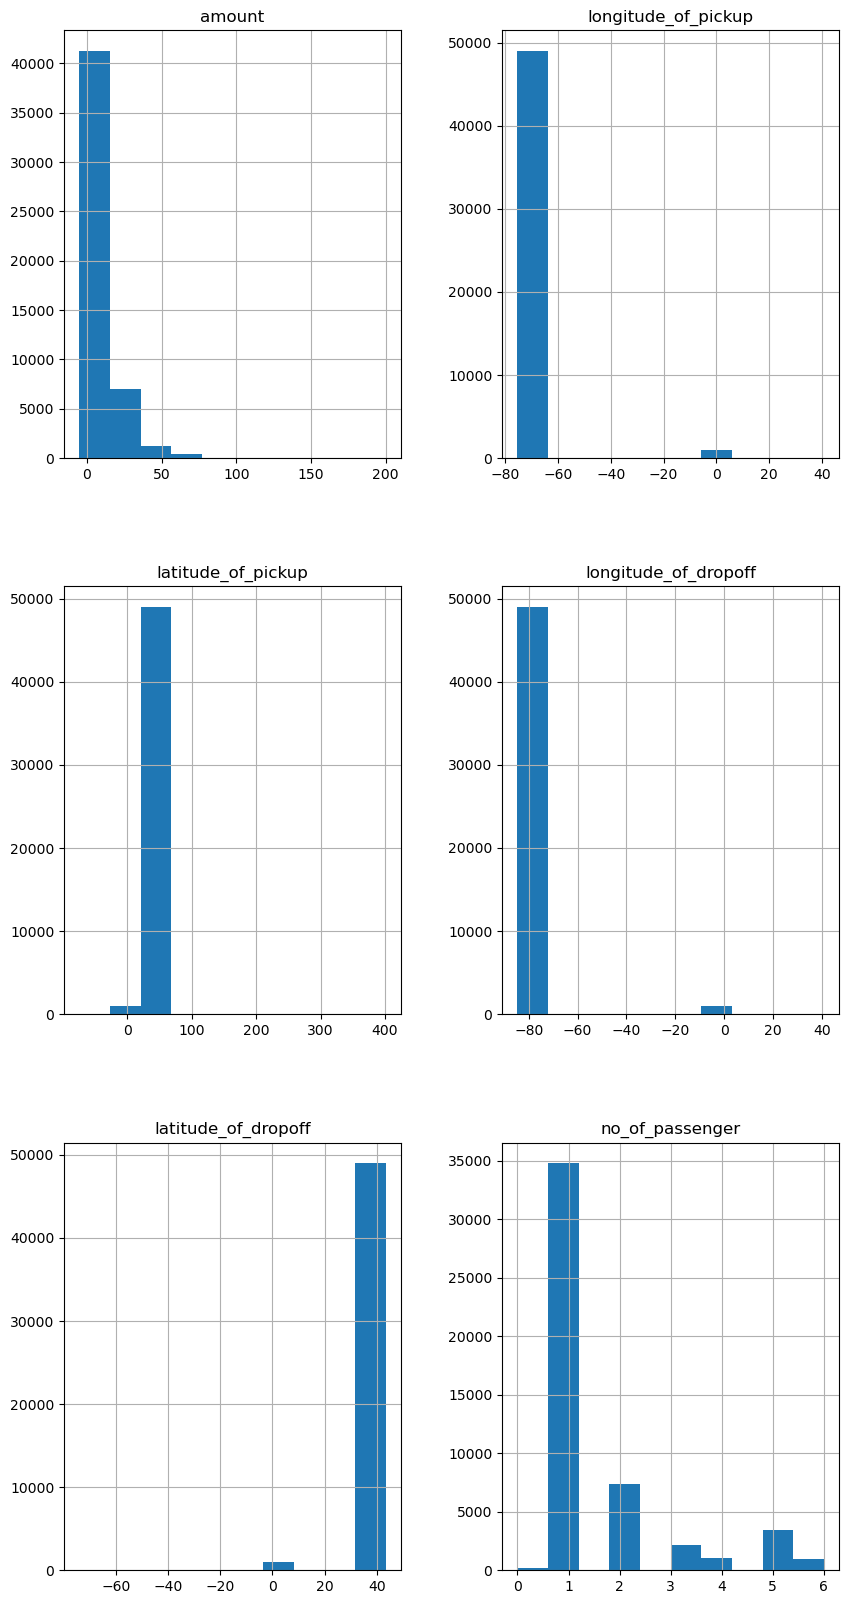

In [13]:
d.hist(figsize=(10,20))

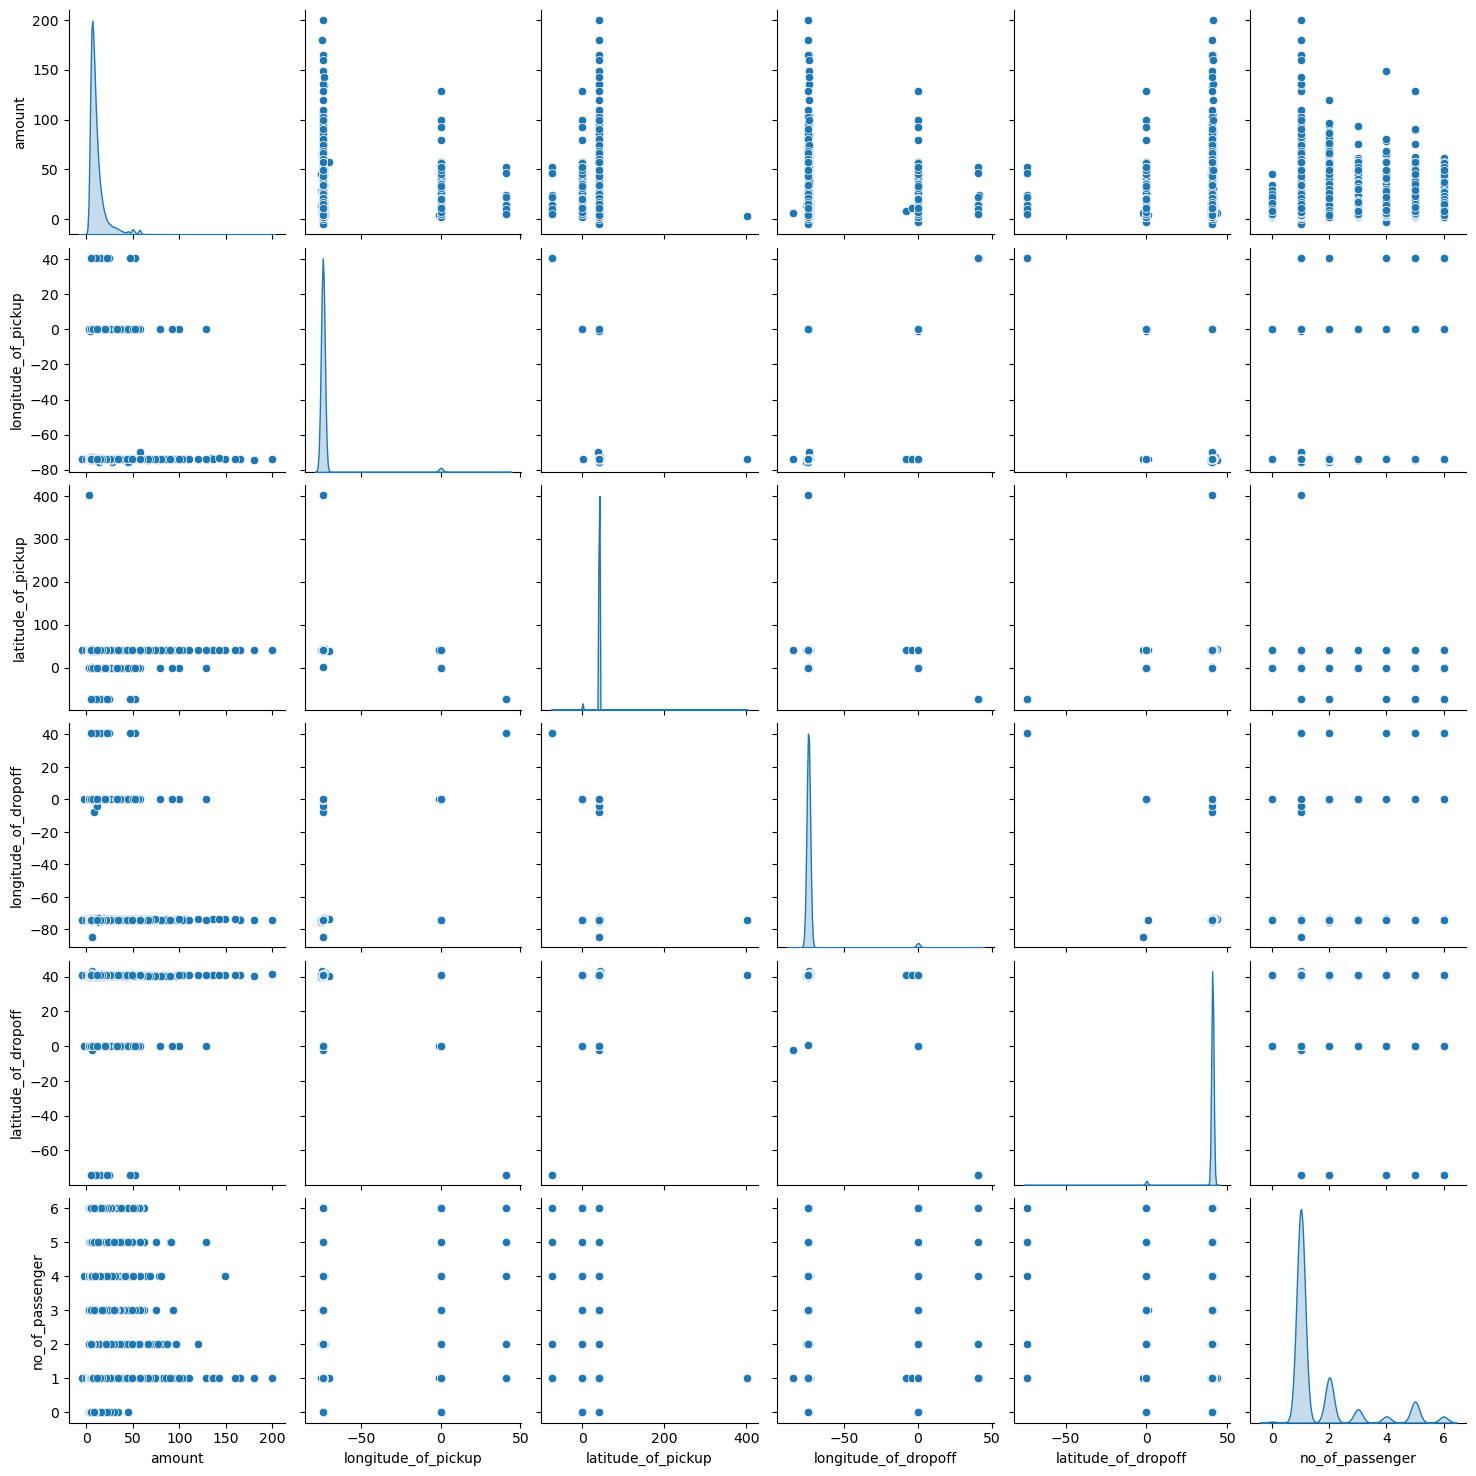

In [14]:
sns.pairplot(d,diag_kind='kde')

## Data Cleaning and Pruning

In [15]:
from collections import Counter
Counter(d['amount']<0)

Counter({False: 49994, True: 6})

In [16]:
d['amount'].describe()

count    50000.000000
mean        11.364171
std          9.685557
min         -5.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64

In [17]:
d = d.drop(d[d['amount']<0].index, axis=0)
d.shape

(49994, 8)

In [18]:
d['amount'].describe()

count    49994.000000
mean        11.365903
std          9.684843
min          0.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64

In [19]:
d['amount'].sort_values(ascending=False)

28373    200.00
1335     180.00
1483     165.00
43956    165.00
46198    160.00
          ...  
36615      2.50
2780       0.01
27891      0.00
10002      0.00
47302      0.00
Name: amount, Length: 49994, dtype: float64

In [20]:
d['no_of_passenger'].describe()

count    49994.000000
mean         1.667860
std          1.289213
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: no_of_passenger, dtype: float64

In [21]:
Counter(d['no_of_passenger']>8)

Counter({False: 49994})

In [22]:
d = d.drop(d[d['no_of_passenger']>8].index, axis = 0)
d.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,49994.000000,49994.000000,49994.000000,49994.000000,49994.000000,49994.000000
mean,11.365903,-72.509586,39.933665,-72.505922,39.926970,1.667860
std,9.684843,10.394472,6.225225,10.403131,6.012441,1.289213
min,0.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734883,-73.991152,40.734375,1.000000
50%,8.500000,-73.981840,40.752679,-73.980082,40.753373,1.000000
75%,12.500000,-73.967153,40.767361,-73.963585,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [23]:
d = d.drop(d[d.isnull().any(1)].index , axis = 0)
d.shape

(49994, 8)

In [24]:
d.isnull().sum().sort_values(ascending = False)

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [25]:
d['date_time_of_pickup'].min(),d['date_time_of_pickup'].max()

('2009-01-01 01:31:49 UTC', '2015-06-30 22:42:39 UTC')

## Removing Invalid Latitude and Longitude

In [26]:
d[['longitude_of_pickup','latitude_of_pickup']].describe()

,longitude_of_pickup,latitude_of_pickup
count,49994.000000,49994.000000
mean,-72.509586,39.933665
std,10.394472,6.225225
min,-75.423848,-74.006893
25%,-73.992062,40.734883
50%,-73.981840,40.752679
75%,-73.967153,40.767361
max,40.783472,401.083332


In [27]:
d[['longitude_of_dropoff','latitude_of_dropoff']].describe()

,longitude_of_dropoff,latitude_of_dropoff
count,49994.000000,49994.000000
mean,-72.505922,39.926970
std,10.403131,6.012441
min,-84.654241,-74.006377
25%,-73.991152,40.734375
50%,-73.980082,40.753373
75%,-73.963585,40.768167
max,40.851027,43.415190


In [28]:
d = d.drop(((d[d['latitude_of_pickup']<-90])|(d[d['latitude_of_pickup']>90])|(d[d['longitude_of_pickup']<-180])|(d[d['longitude_of_pickup']>180])).index, axis=0)
d.shape

(49993, 8)

In [29]:
d = d.drop(((d[d['latitude_of_dropoff']<-90])|(d[d['latitude_of_dropoff']>90])|(d[d['longitude_of_dropoff']<-180])|(d[d['longitude_of_dropoff']>180])).index, axis=0)
d.shape

(49993, 8)

In [30]:
d = d[(d['no_of_passenger'] <= 7)]
d.shape

(49993, 8)

In [31]:
d = d[(d.amount>=2.5) & (d.amount<=500)]
d.shape

(49989, 8)

## Haversine Distance

In [32]:
def haversine_distance(d):
    R = 6371       
    
    pickup_data = d[['longitude_of_pickup','latitude_of_pickup']]
    dropoff_data = d[['longitude_of_dropoff','latitude_of_dropoff']]
    
    phi1 = np.radians(pickup_data['latitude_of_pickup'])
    phi2 = np.radians(dropoff_data['latitude_of_dropoff'])
    
    delta_phi = np.radians(dropoff_data['latitude_of_dropoff'] - pickup_data['latitude_of_pickup'])
    delta_lambda = np.radians(dropoff_data['longitude_of_dropoff'] - pickup_data['longitude_of_pickup'])

    a = np.sin((delta_phi)/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(delta_lambda/2)**2
    
    c = 2 * np.arctan2(np.sqrt(a),np.sqrt(1-a))
    d = R * c
    
    return d

In [33]:
d_distance = pd.DataFrame(haversine_distance(d) , columns=['Distance'])
d = pd.concat([d , d_distance] , axis = 1)

In [34]:
d.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Distance
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [35]:
d.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Distance
count,49989.000000,49989.000000,49989.000000,49989.000000,49989.000000,49989.000000,49989.000000
mean,11.366974,-72.509440,39.926374,-72.505775,39.926886,1.667927,18.339254
std,9.684727,10.394982,6.012319,10.403641,6.012736,1.289260,353.502725
min,2.500000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,0.000000
25%,6.000000,-73.992062,40.734882,-73.991152,40.734375,1.000000,1.223542
50%,8.500000,-73.981840,40.752679,-73.980083,40.753372,1.000000,2.120232
75%,12.500000,-73.967155,40.767359,-73.963592,40.768165,2.000000,3.895837
max,200.000000,40.783472,43.098708,40.851027,43.415190,6.000000,8667.818812


In [36]:
d=d.dropna()
d

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Distance
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157
...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,4.940374
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,0.874706
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,2.263286
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,0.665245


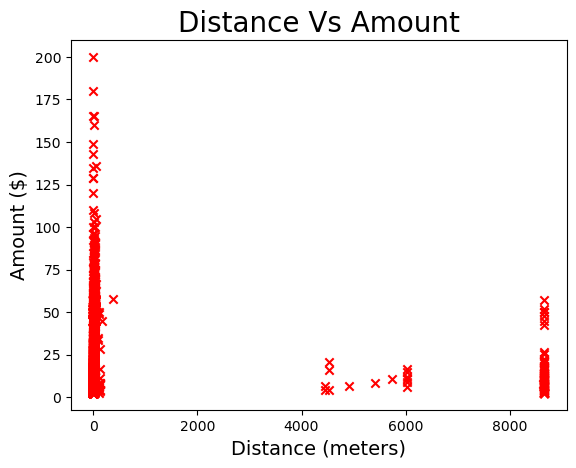

In [37]:
plt.scatter(d['Distance'] , d['amount'] , c = 'r' , marker = 'x')
plt.title('Distance Vs Amount',size = 20)
plt.xlabel('Distance (meters)',size = 14)
plt.ylabel('Amount ($)',size = 14)
plt.show()

## Removing Outliers and Invalid Data

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
y = d['amount']
X = d.drop(['amount'], axis=1)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [40]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((39991, 8), (39991,), (9998, 8), (9998,))

In [41]:
train_df,val_df = train_test_split(d,test_size=0.2,random_state=42)

In [42]:
len(train_df),len(val_df)

(39991, 9998)

In [43]:
def remove_outliers(d):
    return d[(d['longitude_of_pickup']>=-75)
             & (d['longitude_of_pickup']<=-72)
             & (d['longitude_of_dropoff']>=-75)
             & (d['longitude_of_dropoff']<=-72)
             & (d['latitude_of_pickup']>=40)
             & (d['latitude_of_pickup']<=42)
             & (d['latitude_of_dropoff']>=40)
             & (d['latitude_of_dropoff']<=42)
             & (d['no_of_passenger']>=1)
             & (d['no_of_passenger']<=6)
             & (d['amount']>=1)
             & (d['amount']<=500)]
train_df=remove_outliers(train_df)
val_df = remove_outliers(val_df)

In [44]:
len(train_df),len(val_df)

(39020, 9765)

## Analysis After Cleaning the Data

In [45]:
d.describe(include="all")

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Distance
count,49989,49989.000000,49989,49989.000000,49989.000000,49989.000000,49989.000000,49989.000000,49989.000000
unique,3597,NaN,49544,NaN,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2011-09-03 01:30:00 UTC,NaN,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.366974,NaN,-72.509440,39.926374,-72.505775,39.926886,1.667927,18.339254
std,NaN,9.684727,NaN,10.394982,6.012319,10.403641,6.012736,1.289260,353.502725
min,NaN,2.500000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,0.000000
25%,NaN,6.000000,NaN,-73.992062,40.734882,-73.991152,40.734375,1.000000,1.223542
50%,NaN,8.500000,NaN,-73.981840,40.752679,-73.980083,40.753372,1.000000,2.120232
75%,NaN,12.500000,NaN,-73.967155,40.767359,-73.963592,40.768165,2.000000,3.895837


In [46]:
pd.crosstab(d['no_of_passenger'],d['amount'] )

amount,2.50,2.90,3.00,3.30,3.50,3.70,3.80,4.00,4.10,4.20,...,128.61,128.83,135.00,136.00,143.00,149.00,160.00,165.00,180.00,200.00
no_of_passenger,,,,,,,,,,,,,,,,,,,,,
0,1,0,1,5,0,2,0,0,7,0,...,0,0,0,0,0,0,0,0,0,0
1,169,87,68,263,178,501,1,324,762,6,...,0,1,1,1,1,0,1,2,1,1
2,15,20,7,55,24,98,1,57,129,2,...,0,0,0,0,0,0,0,0,0,0
3,4,4,0,22,14,38,0,22,44,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,11,4,11,0,4,14,0,...,0,0,0,0,0,1,0,0,0,0
5,12,6,7,24,13,54,0,25,100,0,...,1,0,0,0,0,0,0,0,0,0
6,2,0,0,1,6,7,0,14,13,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='no_of_passenger', ylabel='count'>

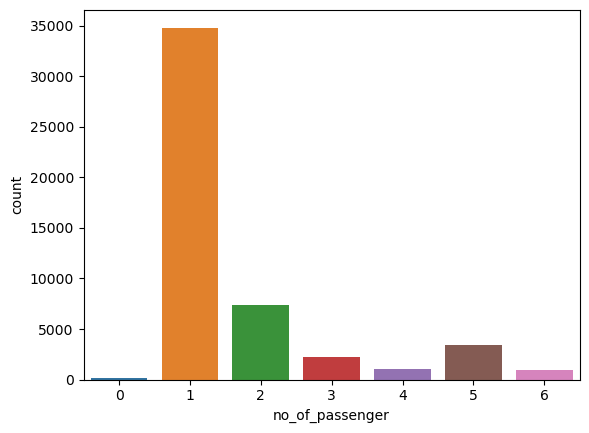

In [47]:
sns.countplot(x="no_of_passenger", data=d)

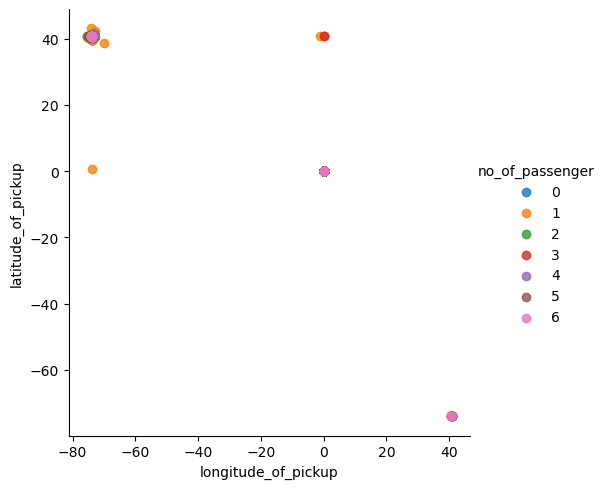

In [48]:
sns.lmplot( x="longitude_of_pickup", y="latitude_of_pickup", data=d, fit_reg=False, hue='no_of_passenger', legend=True)

<AxesSubplot:xlabel='amount', ylabel='longitude_of_dropoff'>

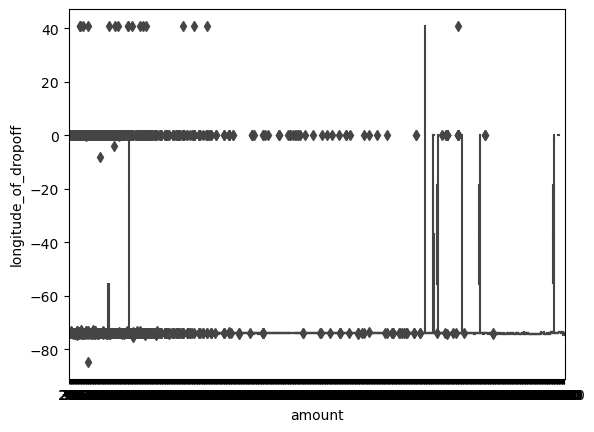

In [49]:
sns.boxplot(x="amount", y="longitude_of_dropoff", data=d)

<AxesSubplot:xlabel='amount', ylabel='latitude_of_dropoff'>

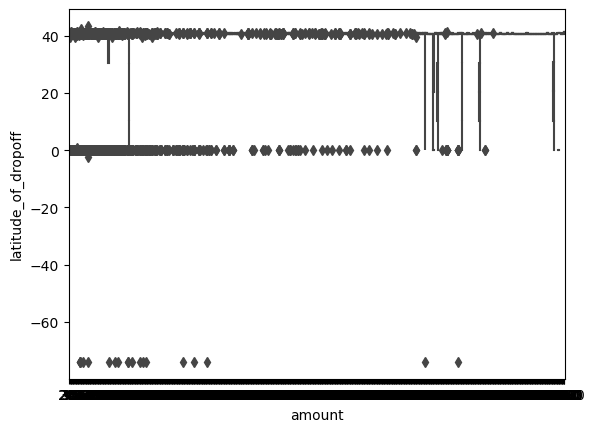

In [50]:
sns.boxplot(x="amount", y="latitude_of_dropoff", data=d)

<AxesSubplot:xlabel='amount', ylabel='Density'>

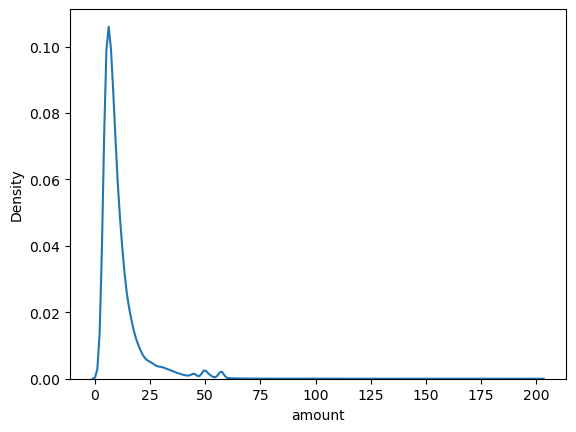

In [51]:
sns.kdeplot(d['amount'])

<AxesSubplot:>

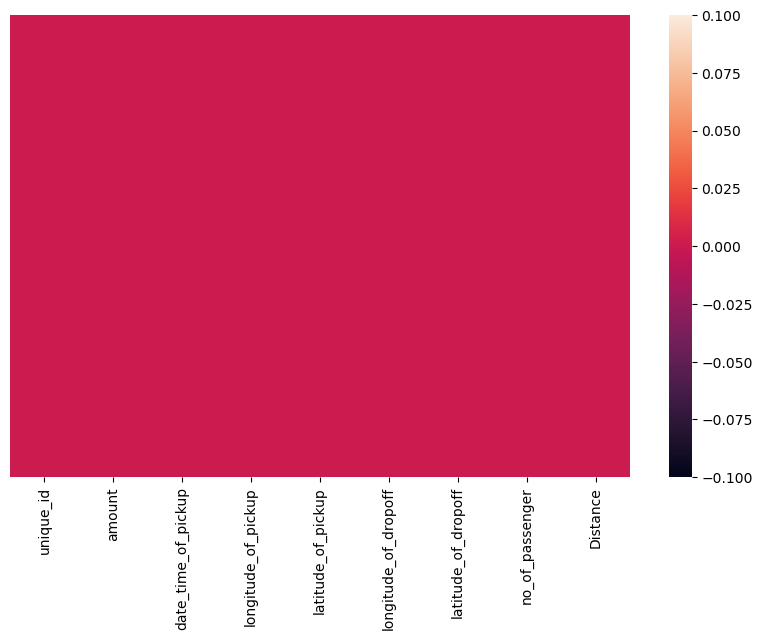

In [52]:
plt.figure(figsize=(10,6))
sns.heatmap(d.isnull(),yticklabels=False)

In [53]:
d.shape

(49989, 9)

## Model Building and Prediction of Values

### Extracting Input and Output

In [54]:
len(train_df),len(val_df)

(39020, 9765)

In [55]:
train_df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'Distance'],
      dtype='object')

In [56]:
val_df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'Distance'],
      dtype='object')

In [57]:
input_cols = ['longitude_of_pickup', 'latitude_of_pickup','longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger', 'Distance']
target_col = ['amount']

In [58]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [59]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39020 entries, 36257 to 15801
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitude_of_pickup   39020 non-null  float64
 1   latitude_of_pickup    39020 non-null  float64
 2   longitude_of_dropoff  39020 non-null  float64
 3   latitude_of_dropoff   39020 non-null  float64
 4   no_of_passenger       39020 non-null  int64  
 5   Distance              39020 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 2.1 MB


In [60]:
train_targets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39020 entries, 36257 to 15801
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   amount  39020 non-null  float64
dtypes: float64(1)
memory usage: 609.7 KB


In [61]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [62]:
val_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9765 entries, 27762 to 11441
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitude_of_pickup   9765 non-null   float64
 1   latitude_of_pickup    9765 non-null   float64
 2   longitude_of_dropoff  9765 non-null   float64
 3   latitude_of_dropoff   9765 non-null   float64
 4   no_of_passenger       9765 non-null   int64  
 5   Distance              9765 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 534.0 KB


In [63]:
val_targets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9765 entries, 27762 to 11441
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   amount  9765 non-null   float64
dtypes: float64(1)
memory usage: 152.6 KB


### -> Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
Model1 = LinearRegression(fit_intercept=True,normalize='deprecated',copy_X=True,n_jobs=None,positive=False,)

In [66]:
Model1.fit(train_inputs,train_targets)

LinearRegression()

In [67]:
Model1.score(train_inputs,train_targets)

0.6363581869345756

In [68]:
Model1.fit(val_inputs,val_targets)

LinearRegression()

In [69]:
Model1.score(val_inputs,val_targets)

0.6128465850091115

In [70]:
Model1.intercept_

array([4408.89749363])

In [71]:
Model1.coef_

array([[ 1.12090820e+01, -3.84230703e+01,  1.66129523e+01,
        -1.91204882e+01, -3.60936847e-02,  1.67733219e+00]])

### ->Decision Tree Regression

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
model2=DecisionTreeRegressor(criterion="friedman_mse")

In [74]:
model2.fit(train_inputs,train_targets)

DecisionTreeRegressor(criterion='friedman_mse')

In [75]:
model2.score(train_inputs,train_targets)

0.9999144877089192

In [76]:
model2.fit(val_inputs,val_targets)

DecisionTreeRegressor(criterion='friedman_mse')

In [77]:
model2.score(val_inputs,val_targets)

0.9999746399398104

### -> Bagging Regressor

In [78]:
from sklearn.ensemble import BaggingRegressor

In [79]:
model3=BaggingRegressor()

In [80]:
model3.fit(train_inputs,train_targets)

BaggingRegressor()

In [81]:
model3.score(train_inputs,train_targets)

0.9547365235134605

In [82]:
model3.fit(val_inputs,val_targets)

BaggingRegressor()

In [83]:
model3.score(val_inputs,val_targets)

0.963785808510599

### -> Gradient Boosting Regressor

In [84]:
from sklearn.ensemble import GradientBoostingRegressor

In [85]:
model4=GradientBoostingRegressor(criterion='friedman_mse',random_state=50,max_features=6,)

In [86]:
model4.fit(train_inputs,train_targets)

GradientBoostingRegressor(max_features=6, random_state=50)

In [87]:
model4.score(train_inputs,train_targets)

0.8266590680455101

In [88]:
model4.fit(val_inputs,val_targets)

GradientBoostingRegressor(max_features=6, random_state=50)

In [89]:
model4.score(val_inputs,val_targets)

0.8619673498534733

### -> Random Forest Regressor

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
model5 = RandomForestRegressor()

In [92]:
model5.fit(train_inputs,train_targets)

RandomForestRegressor()

In [93]:
model5.score(train_inputs,train_targets)

0.967809708039093

In [94]:
model5.fit(val_inputs,val_targets)

RandomForestRegressor()

In [95]:
model5.score(val_inputs,val_targets)

0.9689987515950323

### -> K Nearest Neighbor Regressor

In [96]:
from sklearn.neighbors import KNeighborsRegressor

In [97]:
model6=KNeighborsRegressor(n_neighbors=1)

In [98]:
model6.fit(train_inputs,train_targets)

KNeighborsRegressor(n_neighbors=1)

In [99]:
model6.score(train_inputs,train_targets)

0.9998645757805884

In [100]:
model6.fit(val_inputs,val_targets)

KNeighborsRegressor(n_neighbors=1)

In [101]:
model6.score(val_inputs,val_targets)

0.9999687966079694

### Support Vector Regression on Feature Distance

In [102]:
data = d.sample(n = 1000 , replace = False)
X = np.array(d['Distance']).reshape(len(d),1)
y = np.array(d['amount'])

In [103]:
def svr_SGD_epsilion_insensitive(X,y):
  svr_SGD = SGDRegressor(loss = 'epsilon_insensitive' , max_iter = 100 , tol = 1e-3 , shuffle = True , epsilon = .1 , learning_rate = 'adaptive')
  y_SGD = svr_SGD.fit(X,y)
  
  return svr_SGD

def svr_SGD_squared_epsilon_insensitive(X,y):
  svr_SGD_squared = SGDRegressor(loss = 'squared_epsilon_insensitive' , max_iter = 100 , tol = 1e-3 , shuffle = True , epsilon = .1 , learning_rate = 'adaptive')
  y_SGD = svr_SGD_squared.fit(X,y)
  
  return svr_SGD_squared

In [104]:
from multiprocessing.pool import ThreadPool
from sklearn.linear_model import SGDRegressor

pool = ThreadPool(processes=1)
 
t4 = pool.apply_async(svr_SGD_epsilion_insensitive, (X,y))
t5 = pool.apply_async(svr_SGD_squared_epsilon_insensitive, (X,y))

svr_SGD = t4.get()
svr_SGD_squared = t5.get()

In [105]:
SGD_predict = np.concatenate((svr_SGD.predict(X).reshape(len(d),1),y.reshape(len(d),1)) , axis = 1)
SGD_squared_predict = np.concatenate((svr_SGD_squared.predict(X).reshape(len(d),1),y.reshape(len(d),1)) , axis = 1)

In [106]:
from sklearn.metrics import mean_squared_error

SGD_predict = svr_SGD.predict(X)
SGD_squared_predict = svr_SGD_squared.predict(X)

SGD_error = mean_squared_error(y, SGD_predict)

SGD_squared_error = mean_squared_error(y, SGD_squared_predict)

print(SGD_error,SGD_squared_error)

102.75568606075525 3.065078639832569e+24


## Fare Amount Predictions

In [107]:
Y_predictions = Model1.predict(val_inputs)

print(Y_predictions.shape)
print(val_targets.shape)

(9765, 1)
(9765, 1)


## Plot the Actual and Predicted Values

(1.0, 10000.0)

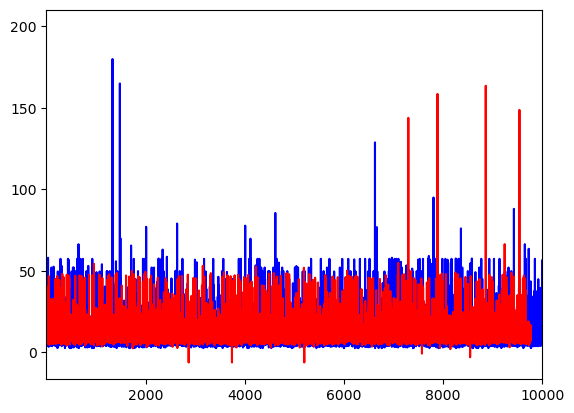

In [108]:
d.head()
Y_test=np.asarray(d['amount'])
plt.plot(Y_test, color = 'blue')
plt.plot(Y_predictions, color = 'red')
plt.xlim(1,10000)

In [109]:
d.corr()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Distance
amount,1.000000,0.005905,-0.006563,0.004452,-0.005600,0.016506,0.016451
longitude_of_pickup,0.005905,1.000000,-0.984132,0.956613,-0.947401,-0.005614,0.143712
latitude_of_pickup,-0.006563,-0.984132,1.000000,-0.943741,0.961374,0.003982,-0.130943
longitude_of_dropoff,0.004452,0.956613,-0.943741,1.000000,-0.982102,-0.004874,0.143172
latitude_of_dropoff,-0.005600,-0.947401,0.961374,-0.982102,1.000000,0.002898,-0.124844
no_of_passenger,0.016506,-0.005614,0.003982,-0.004874,0.002898,1.000000,-0.005371
Distance,0.016451,0.143712,-0.130943,0.143172,-0.124844,-0.005371,1.000000


<AxesSubplot:>

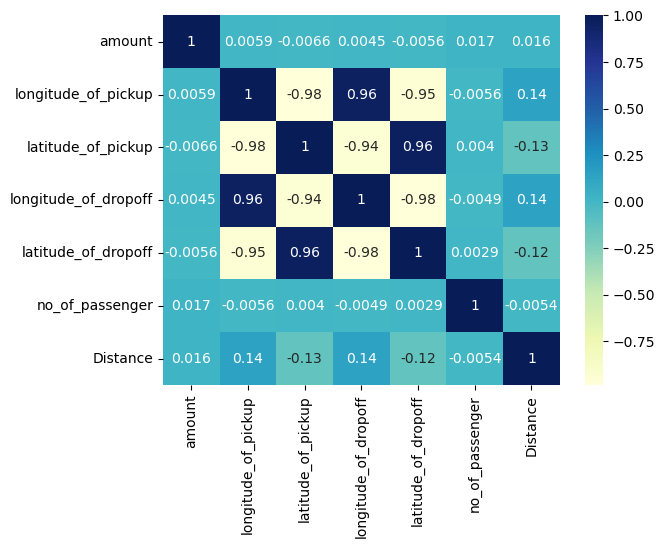

In [110]:
sns.heatmap(d.corr(),annot=True,cmap="YlGnBu")

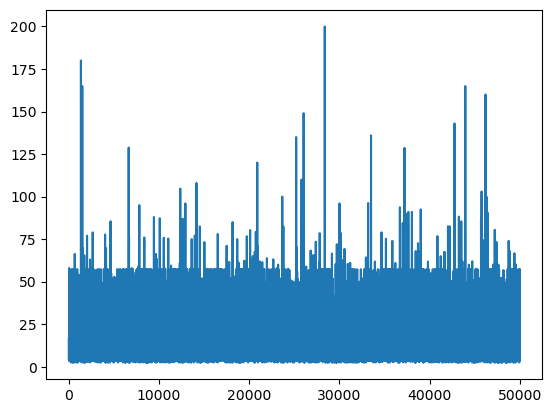

In [111]:
plt.plot(d['amount'])

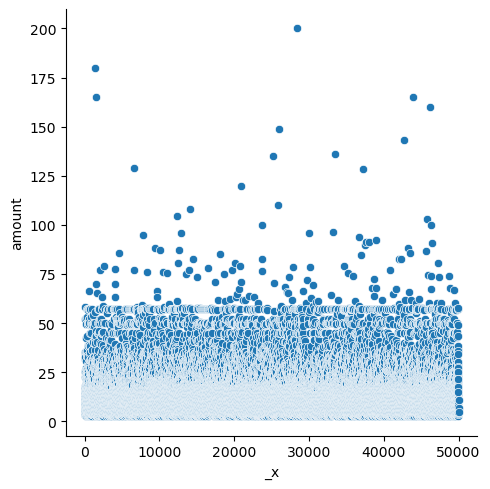

In [112]:
sns.relplot(data = d['amount'])

<AxesSubplot:xlabel='amount'>

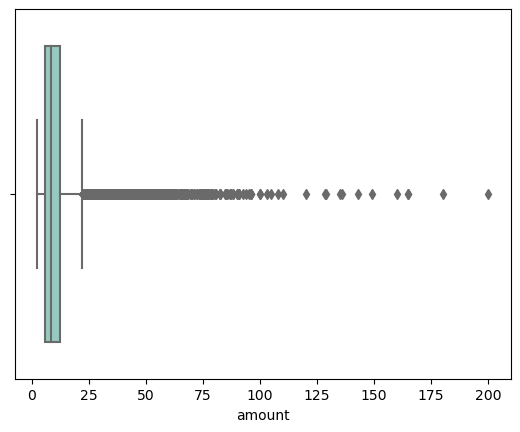

In [113]:
sns.boxplot( x= d["amount"] , orient="h" , palette="Set3", color=".25",)

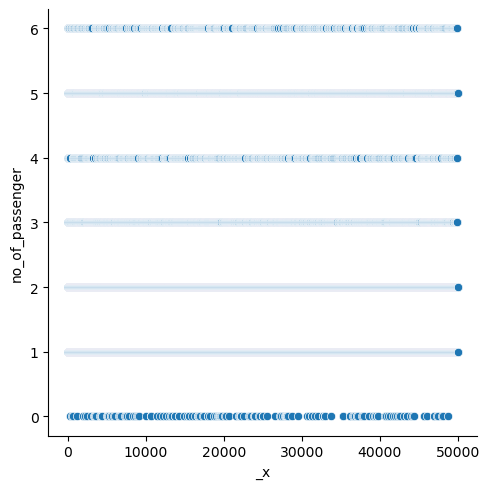

In [114]:
sns.relplot( data = d['no_of_passenger'])